<a href="https://colab.research.google.com/github/AkshayAI007/Topic-modelling-of-news-article-/blob/main/Topic_Modelling_on_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Topic modeling of news article



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual


# **Project Summary -**

The exponential growth of digital content has led to an overwhelming influx of news articles across various domains. Manual categorization and analysis of this vast amount of information are labor-intensive and time-consuming. Unsupervised topic modeling offers a solution by automating the process of identifying key themes within the articles, enabling efficient content organization and information retrieval.**Unsupervised machine learning** techniques have gained significant traction in the field of natural language processing (NLP) due to their ability to extract valuable insights from unstructured text data. This project focuses on applying clustering algorithms, particularly **Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA)**, to perform topic modeling on a diverse collection of news articles. The goal is to uncover hidden thematic structures within the articles and categorize them into coherent topics.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to leverage unsupervised machine learning techniques to perform topic modeling on a collection of news articles from BBC using clustering algorithms such as Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA). The goal is to extract meaningful topics from the articles, allowing for efficient content organization, information retrieval, and trend analysis.The dataset Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install contractions
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.

In [ ]:
import pandas as pd                                                              ## To frame the data
import os                                                                        ## For listing files in given directory
import matplotlib.pyplot as plt                                                  ## For visualization
import seaborn as sns                                                            ## For visualization

from bs4 import BeautifulSoup                                                    ## Python library used to scrape data from webpages
import re                                                                        ## Module which provides regular expression matching operations
import string                                                                    ## For string manipulation
import nltk                                                                      ## Popular library to pre-process the text in NLP
nltk.download('wordnet')                                                        ## Downloading stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer                                          ## A Lemmatizer
from nltk.corpus import stopwords                                                ## Stopwords package from nltk
from wordcloud import WordCloud                                                  ## Create interactive wordclouds

from sklearn.decomposition import TruncatedSVD                                   ## For LSA/LSI
from sklearn.decomposition import NMF                                            ## Non-matrix factorization algorithm
from sklearn.decomposition import LatentDirichletAllocation as LDA               ## Latent Dirichlet Allocation algorithm

import pyLDAvis                                                                  ## To visualize LDA topic modelling
import pyLDAvis.gensim_models                                                      ## pyLDA with sklearn processing
pyLDAvis.enable_notebook()                                                       ## Enabing notebook for pyLDAvis visualizations

from sklearn.feature_extraction.text import CountVectorizer                      ## count-vectorizer to convert text data into vector form

import warnings                                                                  ## Ignore warnings
warnings. simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Projects/Topic_Modeling_on_news_articles/bbc/'


In [ ]:
news=[]
topics=[]
Themes = ['business','entertainment','politics','sport','tech']



In [ ]:
for x in Themes:                                                                 ## For every item in Themes
    all_txt_files=sorted(os.listdir(path+x))                                     ## List all files present in given directory in sorted order
    for files in all_txt_files:                                                  ## For every item in txt_files
        txt_path=path + x + '/' + files                                          ## specifying exact path of every text news file
        with open(txt_path,'rb') as f:                                           ## open a text file
            text=f.read()                                                        ## read text file
        news.append(text)                                                        ## append text file which is our news, to empty news list
        topics.append(x)                                                         ## append the topic of news file to empty

### Dataset First View

In [ ]:
df_raw = pd.DataFrame()                                                          ## creating empty dataframe

In [ ]:
df_raw['News_text'] = news                                                       ## adding News column
df_raw['News_Theme'] = topics                                                    ## adding News_theme column

In [ ]:
df_raw.head()



,News_text,News_Theme
0,b'Ad sales boost Time Warner profit\n\nQuarter...,business
1,b'Dollar gains on Greenspan speech\n\nThe doll...,business
2,b'Yukos unit buyer faces loan claim\n\nThe own...,business
3,b'High fuel prices hit BA\'s profits\n\nBritis...,business
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...",business


In [ ]:
df_raw.tail()

,News_text,News_Theme
2220,b'BT program to beat dialler scams\n\nBT is in...,tech
2221,b'Spam e-mails tempt net shoppers\n\nComputer ...,tech
2222,b'Be careful how you code\n\nA new European di...,tech
2223,b'US cyber security chief resigns\n\nThe man m...,tech
2224,b'Losing yourself in online gaming\n\nOnline r...,tech


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_raw.shape


(2225, 2)

### Dataset Information

In [ ]:
# Dataset Info
df = df_raw.copy()                                                               ## First creating a deep copy


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2225 non-null   object
 1   News_Theme  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.drop_duplicates(keep = 'first',inplace = True)                                ## Dropping duplicate values/rows

df.shape

(2127, 2)

In [ ]:
#Number of duplicate values
2225-2127== 98


True

 The dataset contains total 98 duplicate rows and does not contain any missing values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


News_text     0
News_Theme    0
dtype: int64

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

 The dataset contains total 98 duplicate rows and does not contain any missing values.There are total 2225 news article

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['News_text', 'News_Theme'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,News_text,News_Theme
count,2127,2127
unique,2127,5
top,b'Ad sales boost Time Warner profit\n\nQuarter...,sport
freq,1,505


### Variables Description

Variables Description
We have two columns with datatype object -

 **News_Text**- contains the news in .txt format

**News_Theme**- contains the theme/topic which the news belong to.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

No need of Data wrangling

### What all manipulations have you done and insights you found?

None

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
a = df['News_Theme'].value_counts()
a

News_Theme
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

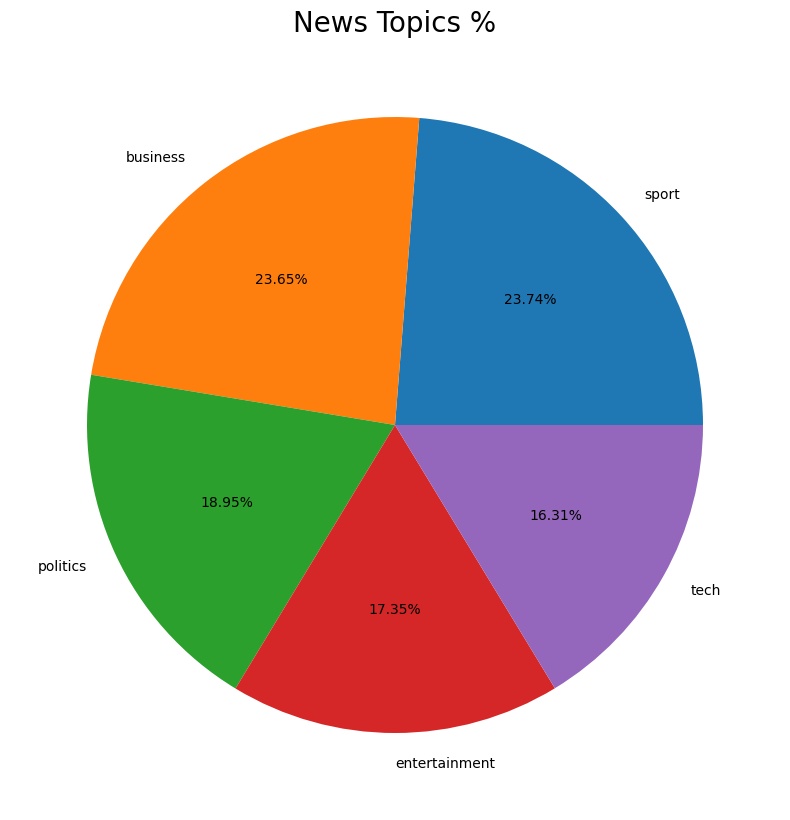

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(a, autopct = '%0.2f%%' , labels = a.index)
plt.title('News Topics %', size = 20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart gives us an apt idea about the frequency distribution of diffrent variables

##### 2. What is/are the insight(s) found from the chart?

The dataset contains maximum news from Sports topic followed by bussiness,politics, entertainment and tech.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values hence not needed

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Not needed

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Not needed

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***